In [17]:
""" fd1d_2_1.py: 1D FDTD
Simulation of a dielectric slab
"""

import numpy as np
from math import pi, sin
from matplotlib import pyplot as plt

In [18]:
ke = 200
ex = np.zeros(ke)
dx = np.zeros(ke)
ix = np.zeros(ke)
hy = np.zeros(ke)

ddx = 0.01 # Cell size
dt = ddx / 6e8 # Time step size
freq_in = 700e6

boundary_low = [0, 0]
boundary_high = [0, 0]

# Create Dielectric Profile
epsz = 8.854e-12
epsr = 4
sigma = 0.04
k_start = 100


gax = np.ones(ke)
gbx = np.zeros(ke)
gax[k_start:] = 1 / (epsr + (sigma * dt / epsz))
gbx[k_start:] = sigma * dt / epsz

nsteps = 500

# Main FDTD Loop
for time_step in range(1, nsteps + 1):
    # Calculate Dx
    for k in range(1, ke):
         dx[k] = dx[k] + 0.5 * (hy[k - 1] - hy[k])
  
  
    # Put a sinusoidal at the low end
    pulse = sin(2 * pi * freq_in * dt * time_step)
    dx[5] = pulse + dx[5]
  
  
    # Calculate the Ex field from Dx
    for k in range(1, ke):
         ex[k] = gax[k] * (dx[k] - ix[k])
         ix[k] = ix[k] + gbx[k] * ex[k]
  
  
    # Absorbing Boundary Conditions
    ex[0] = boundary_low.pop(0)
    boundary_low.append(ex[1])
    ex[ke - 1] = boundary_high.pop(0)
    boundary_high.append(ex[ke - 2])
  
  
    # Calculate the Hy field
    for k in range(ke-1):
         hy[k]=hy[k]+0.5*(ex[k]-ex[k+1])
 

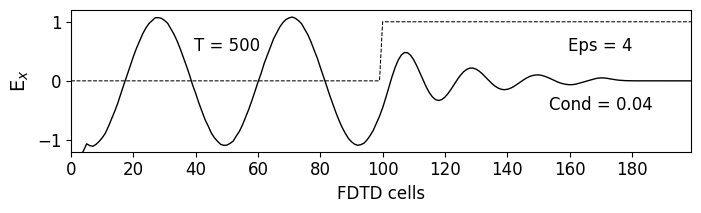

In [ ]:

plt.rcParams['font.size'] = 12
plt.figure(figsize=(8, 2.25))
plt.plot(ex, color='k', linewidth=1)
plt.ylabel('E$_x$', fontsize='14')
plt.xticks(np.arange(0, 199, step=20))
plt.xlim(0, 199)
plt.yticks(np.arange(-1, 1.2, step=1))
plt.ylim(-1.2, 1.2)
plt.text(50, 0.5, 'T = {}'.format(time_step),
          horizontalalignment='center')
plt.plot(gbx / gbx[k_start], 'k--',
          linewidth=0.75)# Scaled for plotting
plt.text(170, 0.5, 'Eps = {}'.format(epsr),
          horizontalalignment='center')
plt.text(170, -0.5, 'Cond = {}'.format(sigma),
          horizontalalignment='center')
plt.xlabel('FDTD cells')
plt.subplots_adjust(bottom=0.25, hspace=0.45)
plt.show()